In [2]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Gain Intuitions by Solving 2-dimensional problem

To begin to understand exact and numerical approaches to the optimization problem of interest to the Hendricks group for the Hidden Ancestries project, in this notebook we attempt to solve the following 2-dimensional quadratic optimization problem:

$$\min_{(x,y)\in \mathbb{R}^2} f(x,y)=(ax+by-c)^2$$

$$\text{subject to:} \quad x+y=1 \quad x\geq 0 \quad y \geq 0,$$

where $a,b,c \in \mathbb{R}$ are quantities obtained from a genetics simulation.

In [35]:
#a=0.3
#b=0.05
#c=0.2

# Sample size

M=10000

a = np.random.uniform(low=0, high=0.5, size=(M,1))
b = np.random.uniform(low=0.2, high=0.5, size=(M,1))
c = np.random.uniform(low=0, high=0.5, size=(M,1))

In [38]:
def function(x):
    return np.sum((a*x[0]+b*x[1]-c)**2,axis=0)

In [39]:
x_t=np.array((0.5,0.5))

print(function(x_t))

[301.57899862]


In [40]:
#def gradfun(x):
    #return np.array((2*a*(a*x[0]+b*x[1]-c),2*b*(a*x[0]+b*x[1]-c)))

## Analytic Solution (2d)

In two dimensions, we have a (potential) analytic solution given by

$$x^*=\left(\frac{c-b}{a-b},\frac{a-c}{a-b}\right)$$

In [5]:
print((c-b)/(a-b),(a-c)/(a-b))
function(((c-b)/(a-b),(a-c)/(a-b)))

0.6000000000000001 0.3999999999999999


0.0

In [6]:
print(gradfun(((c-b)/(a-b),(a-c)/(a-b))))

[0. 0.]


## Grid Searching

In [45]:
x=np.arange(0,1,0.01)
y=1-x

In [47]:
f=0
f_hist=np.array(f)

for i in range(1,100):
    f= function((x[i],y[i]))
    f_hist=np.vstack((f_hist,f))

f_hist=f_hist[1:]
#print(f_hist)
ind=np.argmin(f_hist)
print(x[ind],y[ind])

0.44 0.56


## SLSQP

In [48]:
x0=np.array((0.5,0.5))


cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] -1},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

bnds = ((0, None), (0, None))

In [49]:
minimize(function, x0, method='SLSQP', bounds=bnds, constraints=cons)

# Run time?

     fun: 300.6686168506673
     jac: array([464.69695663, 464.69695663])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.45097834, 0.54902166])

## Visualizations

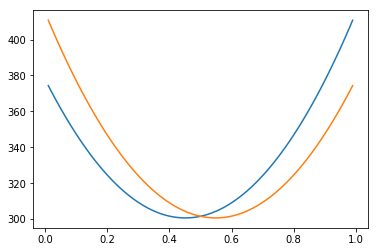

In [50]:
plt.plot(x[1:],f_hist)
plt.plot(y[1:],f_hist)